# Repaso (Módulo 3)
> Recordar que el tema principal del módulo son las ecuaciones diferenciales. Entonces, al finalizar este módulo, las competencias principales que deben tener ustedes es
> - Resolver de forma numérica ecuaciones diferenciales ordinarias (EDO) de cualquier orden.
> - Graficar soluciones de dichas EDO en diferentes representaciones.
> - Interpretar o concluir acerca de las gráficas que se obtuvieron.

___
## Ejemplo 1. Conejos vs. Ovejas.

Imaginemos que en un mismo ecosistema se encuentran conejos y ovejas. Supongamos, además, que ambas compiten por el mismo alimento (hierba) y que la cantidad total de alimento es limitada. Se ignoran otros factores como depredadores, efectos de temporada (estaciones), y otras fuentes de comida. El modelo de competición entre dos especies **Lotka-Volterra** nos sirve para describir este fenómeno.

Dos fenómenos importantes:
- Cada especie crecería hasta su capacidad máxima en ausencia de la otra especie. Esto se puede modelar con la ecuación logística para cada especie. Los conejos tienen una habilidad soprendente para reproducirse, entonces comparativamente deberían crecer más.
- Cuando conejos y ovejas se encuentran, empieza la competencia. Algunas veces los conejos comen, pero las ovejas (al ser más grandes) ganarán el derecho a la comida la mayoría de las veces. Supondremos que dichos conflictos se dan a una tasa proporcional al tamaño de cada población (si hay dos veces más ovejas, la probabilidad de que un conejo encuentre a una oveja será el doble). Supondremos que dicha competencia disminuirá la tasa de crecimiento para cada especie, y el efecto será mayor para los conejos.

Con las consideraciones anteriores, un modelo específico es:

\begin{align}
\frac{dx_1}{dt} &= x_1(3-x_1-2x_2)\\
\frac{dx_2}{dt} &= x_2(2-x_2-x_1),
\end{align}

donde $x_1(t)\geq 0$ es la población de conejos al instante $t$ y $x_2(t)\geq 0$ es la población de ovejas al instante $t$. Definimos $x=\left[x_1\quad x_2\right]^T$.

Esta selección de coeficientes se tiene para recrear el escenario descrito. Sin embargo, este modelo se puede utilizar para estudiar competición entre especies en general y los coeficientes cambiarán en cada caso.

Simule el sistema para cada una de las siguientes condiciones iniciales. Para cada caso, obtenga gráficas de $x_1$ vs. $t$, $x_2$ vs. $t$ y $x_2$ vs. $x_1$. ¿Qué pasa con las poblaciones de conejos y de ovejas cuando $t\to\infty$? ¿Pueden coexistir?

1. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [0.5 \quad 1]^T$.
2. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 0.5]^T$.
3. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1.5 \quad 1]^T$.
4. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1.5]^T$.
5. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1]^T$.

In [2]:
solve_ivp?

In [3]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
def fun(t,X):
    x1= X[0]
    x2= X[1]
    dx1= x1*(3-x1-2*x2)
    dx2= x2*(2-x2-x1)
    return [dx1,dx2]
t= [0,10]
x0= np.array([0.5,1])
sol_x= solve_ivp(fun,t,x0)
sol_x

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.10457941,  0.67667585,  1.24877229,  1.93712903,
        2.79643786,  4.10649303,  5.24643946,  6.37977174,  7.43692591,
        8.42782279,  9.40899369, 10.        ])
 t_events: None
        y: array([[5.00000000e-01, 5.23401046e-01, 5.65941037e-01, 5.20568753e-01,
        4.25275609e-01, 2.94233225e-01, 1.31124285e-01, 5.23021704e-02,
        1.85228962e-02, 6.66142182e-03, 2.50489496e-03, 9.44191276e-04,
        5.23531172e-04],
       [1.00000000e+00, 1.04956843e+00, 1.23933812e+00, 1.35275585e+00,
        1.46488090e+00, 1.60442431e+00, 1.80038087e+00, 1.91181307e+00,
        1.96648145e+00, 1.98738274e+00, 1.99512851e+00, 1.99813798e+00,
        1.99896169e+00]])
 y_events: None

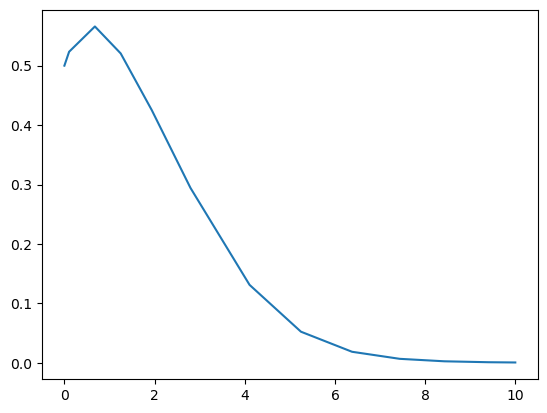

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(sol_x.t,sol_x.y[0,:])

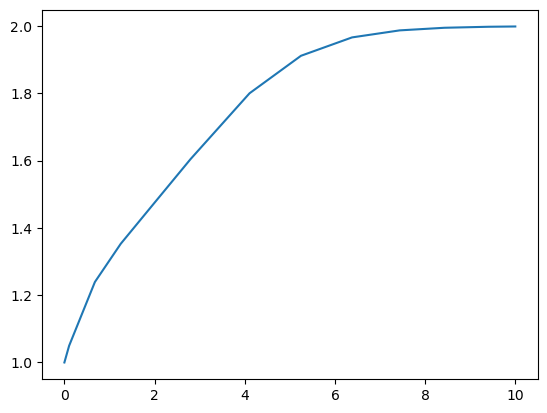

In [5]:
plt.figure()
plt.plot(sol_x.t,sol_x.y[1,:])

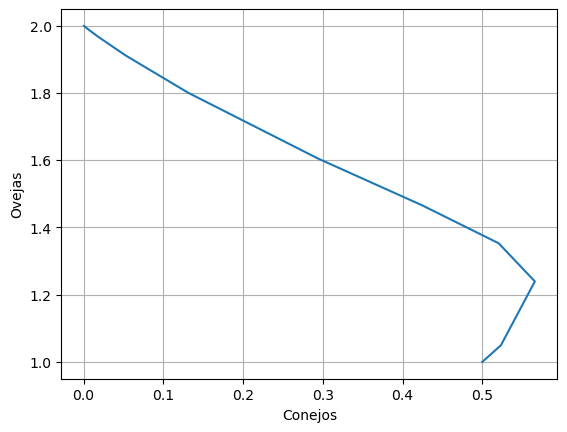

In [7]:
plt.figure()
plt.plot(sol_x.y[0,:], sol_x.y[1,:])
plt.xlabel("Conejos")
plt.ylabel("Ovejas")
plt.grid()

In [8]:
t= [0,1000]
x0= np.array([0.5,1])
sol_x= solve_ivp(fun,t,x0)
sol_x

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 3656
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.04579409e-01, 6.76675852e-01, 1.24877229e+00,
       1.93712903e+00, 2.79643786e+00, 4.10649303e+00, 5.24643946e+00,
       6.37977174e+00, 7.43692591e+00, 8.42782279e+00, 9.40899369e+00,
       1.04174439e+01, 1.14993334e+01, 1.27196049e+01, 1.41638044e+01,
       1.59498721e+01, 1.82612571e+01, 2.13921096e+01, 2.40579527e+01,
       2.57490107e+01, 2.74400687e+01, 2.91705928e+01, 3.08649161e+01,
       3.24928606e+01, 3.41004787e+01, 3.57539305e+01, 3.74675195e+01,
       3.91854713e+01, 4.08479831e+01, 4.24620497e+01, 4.40877832e+01,
       4.57707212e+01, 4.74911169e+01, 4.91852190e+01, 5.08223345e+01,
       5.24377047e+01, 5.40889090e+01, 5.57926362e+01, 5.75046550e+01,
       5.91718162e+01, 6.07950745e+01, 6.24241592e+01, 6.41008261e+01,
       6.58124572e+01, 6.75055939e+01, 

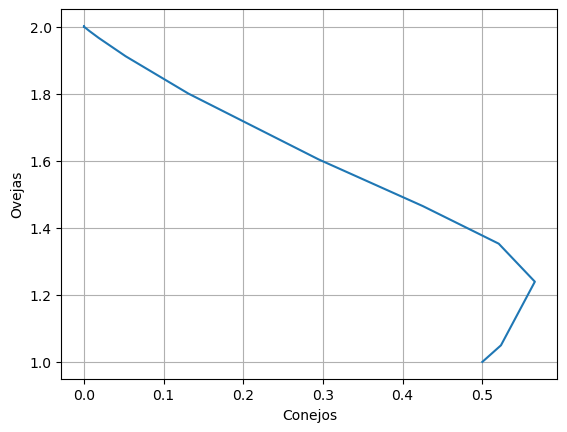

In [9]:
plt.figure()
plt.plot(sol_x.y[0,:], sol_x.y[1,:])
plt.xlabel("Conejos")
plt.ylabel("Ovejas")
plt.grid()

**Conclusión:**


Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

## Ejemplo 2

### Primer punto. 
Resolver el siguiente sistema:

\begin{align}
\frac{dx}{dt} &= v \\
\frac{dv}{dt} &= -0.7 (\frac{dx}{dt})^2 \text{sign}{(\frac{dx}{dt})} - 100 \sin{(x)},
\end{align}


$$ x(0) = \frac{\pi}{3}$$
$$ v(0) = 0$$

In [10]:
def oscilador(t, X):
    x = X[0]
    v = X[1]
    dx=v
    dv=-0.7*dx**2*np.sign(dx)-100*np.sin(x)
    return [dx,dv]
tspan = [-10, 10]
x0 = np.array([np.pi/3, 0])
sol = solve_ivp(oscilador, tspan, x0, max_step=0.01)

### Segundo punto.
1. Graficar $x$ vs $t$.

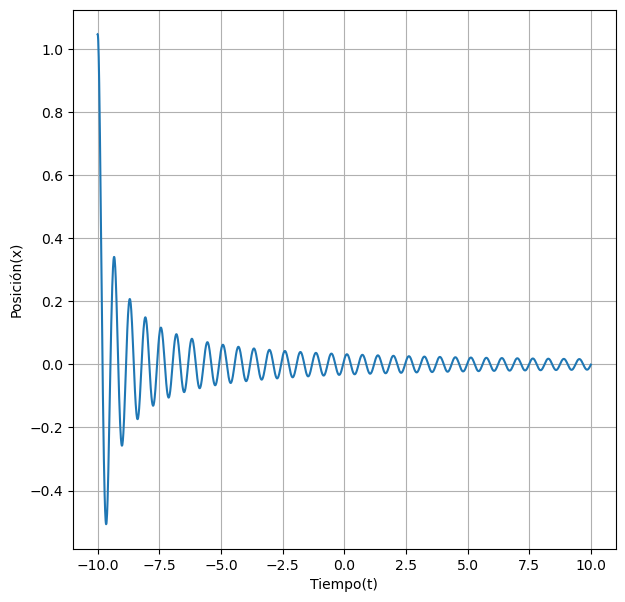

In [12]:
plt.figure(figsize=(7,7))
plt.plot(sol.t, sol.y[0,:])
plt.xlabel("Tiempo(t)")
plt.ylabel("Posición(x)")
plt.grid()

2. Graficar $t$ vs $v$.

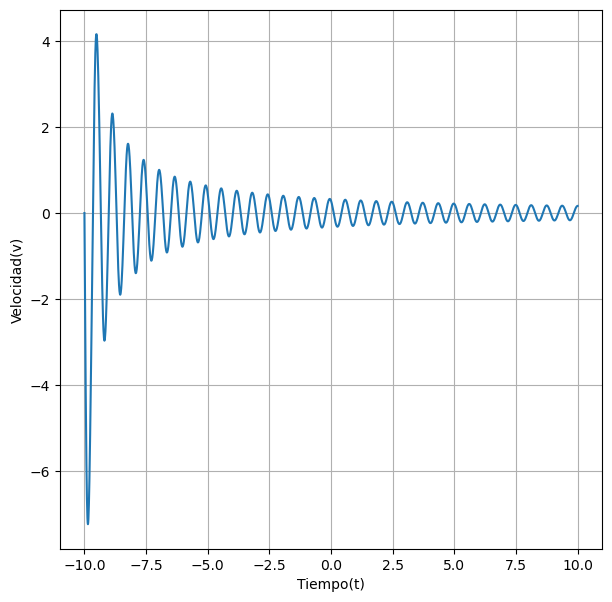

In [14]:
plt.figure(figsize=(7,7))
plt.plot(sol.t, sol.y[1,:])
plt.xlabel("Tiempo(t)")
plt.ylabel("Velocidad(v)")
plt.grid()

3. Graficar $x$ vs $v$.

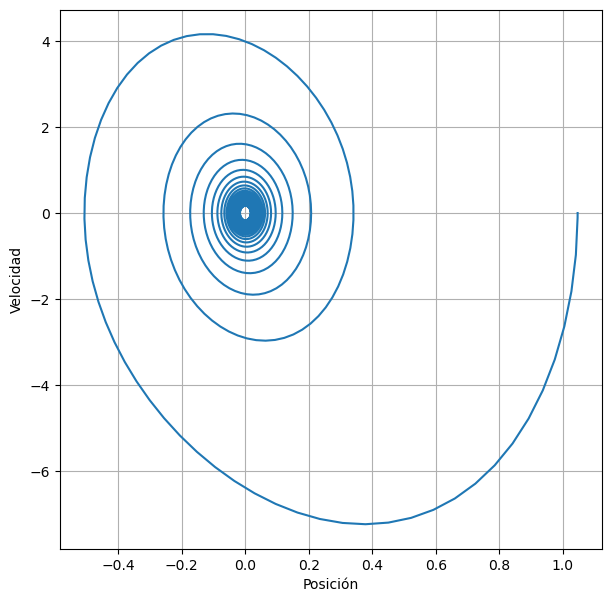

In [15]:
plt.figure(figsize=(7,7))
plt.plot(sol.y[0,:], sol.y[1,:])
plt.xlabel("Posición")
plt.ylabel("Velocidad")
plt.grid()

## Ejemplo 3

¿Qué es una ecuación diferencial?

Una ecuacion que depende de su misma tasa de cambio

¿Qué es la solución de una ecuación diferencial?

Una función que satisface la ecuación diferencial

¿Qué es una condición inicial? ¿Por qué se necesita para poder resolver numéricamente una ecuación diferencial de primer orden?

Son los paramétros que nos indican de donde vamos a partir en nuestra ecuación

Si tuviera un sistema de 3 ecuaciones diferenciales con 3 variables diferentes, ¿cuántas condiciones iniciales se necesitan? ¿Por qué?

Se necesitan minimo 3 condiciones inciales de las 3 variables diferentes para así poder darle al problema un punto de partida y que pueda resolverlo

¿Cuál es la diferencia entre los siguientes tipos de errores?
- Norma del error
- Error cuadrático medio
- Integral del error cuadrático

La norma del error es la suma de los errores al cuadrado y al final se saca la raíz, el error cuadratico medio es tal cual un promedio de la suma de los errores al cuadrado y por último la integral del error cuadrático se saca con la aproximación rectangular del error cuadrático